# Pandas

If you've never used `pandas` before, it's amazingly useful, and at times frustrating.

Recommended links: 

 - http://pandas.pydata.org/pandas-docs/stable/gotchas.html
 - https://github.com/dwhitena/blog-content/blob/master/python_pitfalls/Python-Pitfalls.ipynb
 - http://pandas.pydata.org/pandas-docs/stable/cookbook.html

Read through this full series of excellent blog posts by [Tom Augspurger](http://tomaugspurger.github.io/modern-1.html).

High level tip

 - try to represent data in the proper format
   - floats as floats; ints as ints; etc. 
   - Especially if you have dates, or timestamps, or datetimestamps, keep them in that format. 
      
This pdf [Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham is an excellent read with a lot that relates to data analysis in any language. 

In [1]:
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.11 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.2.0
OS Darwin 15.5.0 x86_64 i386 64bit
numpy 1.11.0
scipy 0.17.1
matplotlib 1.5.1
pandas 0.17.1
Wed Jun 08 18:02:20 2016 PDT

In [2]:
from __future__ import absolute_import, division, print_function

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 


import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston

### Note

Using cleaned data from [Data Cleaning](Data%20Cleaning.ipynb) Notebook. See Notebook for details.

In [3]:
df = pd.read_csv("../data/coal_prod_cleaned.csv")

## Notebook Extensions -- qgrid

In [4]:
# !pip install qgrid

In [5]:
# Check out http://nbviewer.ipython.org/github/quantopian/qgrid/blob/master/qgrid_demo.ipynb for more (including demo)
import qgrid # Best practices is to put imports at the top of the Notebook.
qgrid.nbinstall(overwrite=True)

In [6]:
df.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,102838,4,Independent Producer Operator,2712,Appalachia Southern,Bibb,Hebron Mine,Alabama,Permanently abandoned,Surface,Birmingham Coal & Coke Company,"2477 Valleydale Rd. S. B3, Birmingham, AL 35244",Mine only,10572,NaN,2002
1,103184,5,Independent Producer Operator,2480,Appalachia Southern,Fayette,Berry Mine,Alabama,Temporarily closed,Surface,Midas Coal Company Incorporate,"401 10th Avenue, S. E, Cullman, AL 35055",Mine only,9725,NaN,2002
2,100329,55,Operating Subsidiary,123618,Appalachia Southern,Jefferson,Concord Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Road, Adger, AL 35006",Preparation Plant,0,United Mine Workers of America,2002
3,100851,331,Operating Subsidiary,748182,Appalachia Southern,Jefferson,Oak Grove Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Rd, Adger, AL 35006",Mine only,1942153,United Mine Workers of America,2002
4,102354,28,Independent Producer Operator,55306,Appalachia Southern,Jefferson,Lindbergh,Alabama,Active,Surface,C & H Mining Company Inc,"P.O. Box 70250, Tuscaloosa, AL 35407",Mine only,168446,NaN,2002


In [8]:
qgrid.show_grid(df[['MSHA_ID', 'Year', 'Mine_Name', 'Mine_State', 'Mine_County']], remote_js=True)

In [14]:
%matplotlib inline

In [11]:
%matplotlib notebook

In [16]:
import mpld3

In [17]:
mpld3.enable_notebook()

In [19]:
mpld3.disable_notebook()

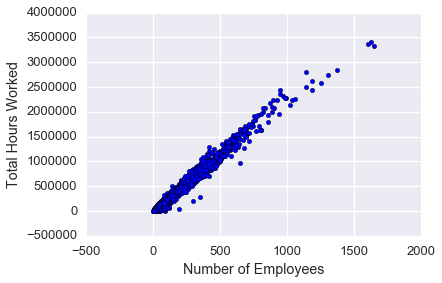

In [18]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

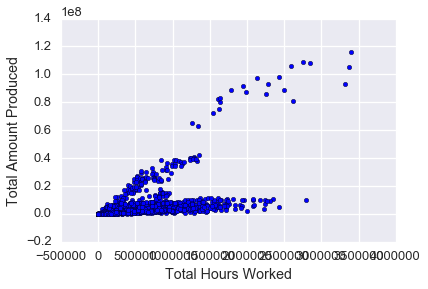

In [20]:
plt.scatter(df.Labor_Hours, df.Production_short_tons, )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")

In [21]:
colors = sns.color_palette(n_colors=11)

In [22]:
color_dict = {key: value for key, value in zip(sorted(df.Year.unique()), colors)}

In [23]:
color_dict

{2002: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2003: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2004: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2005: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2006: (0.8, 0.7254901960784313, 0.4549019607843137),
 2007: (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 2008: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2009: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2010: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2011: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2012: (0.8, 0.7254901960784313, 0.4549019607843137)}

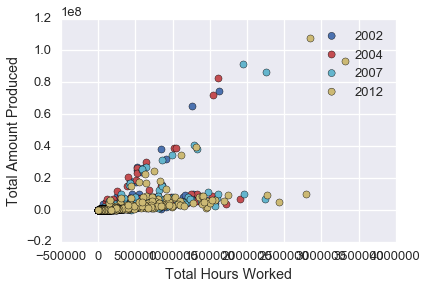

In [24]:
for year in sorted(df.Year.unique()[[0,2, 5, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
plt.savefig("ex1.png")

In [25]:
df_dict = load_boston()
features = pd.DataFrame(data=df_dict.data, columns = df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target, columns = ['MEDV'])
df = pd.concat([features, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


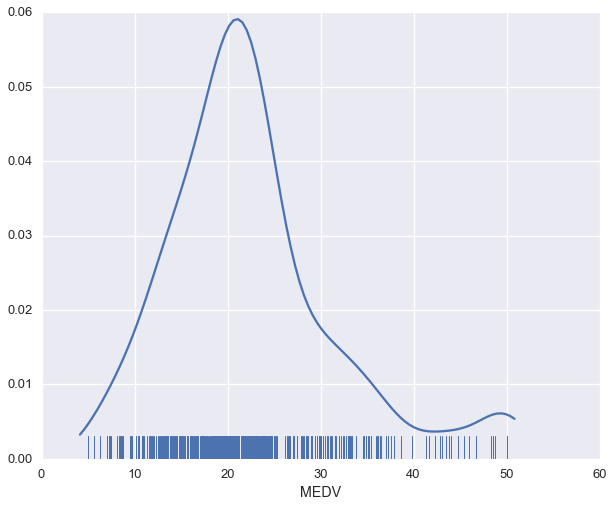

In [26]:
# Target variable
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df.MEDV, ax=ax, rug=True, hist=False)

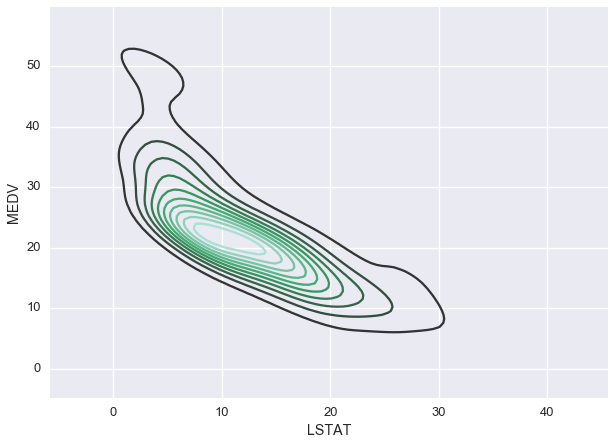

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.LSTAT,
            df.MEDV,
            ax=ax)

/Users/jonathan/miniconda2/envs/jupyter_tricks_py2/lib/python2.7/site-packages/pandas/tools/plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


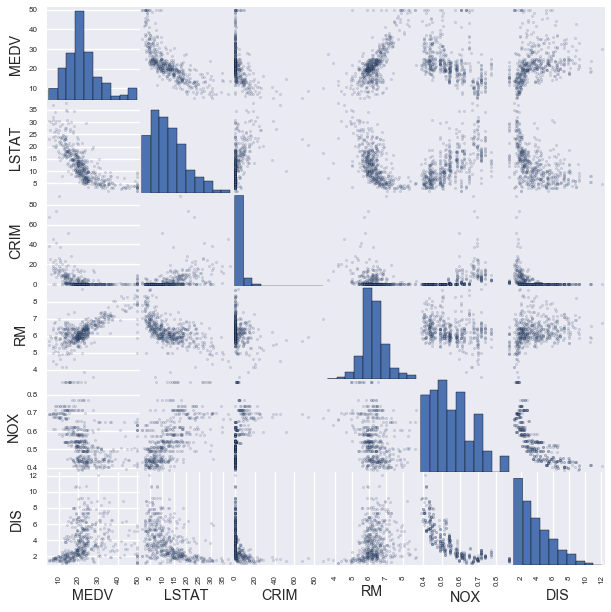

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(df[['MEDV', 'LSTAT', 'CRIM', 'RM', 'NOX', 'DIS']], alpha=0.2, diagonal='hist', ax=ax);